## House Price Prediction using Linear Regression: Part 3


## Introduction of project
Goal: My goal for this project is to use multiple features to create a model that then can be used to predict the price of any house. 

Part 3: In order to progress my understanding of linear regression further I will use multiple data sets with multiple data sets. Instead of just using the sqft of a house to predict its price I will now also use number of bedrooms, floors and age of the property. I will use the scikit learn library to fit a model and then use the test set data to provide an accuracy score of this model. I will then use this model to predict a house price when given the sqft of the house. 

Step 1: Create and format data<br>
Step 2: Split data into training and tests sets<br>
Step 3: Create and train model<br>
Step 4: Plot predictions verses actual prices<br>
Step 5: Use model to make prediction

### Step 1: Create and format data

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [272]:
np.random.seed(42)

# Create features
size = np.random.randint(1000, 3000, 100)
bedrooms = np.random.randint(1, 5, 100)
floors = np.random.randint(1, 3, 100)
age = np.random.randint(1, 100, 100)

# Target variable (price)
price = 50000 + (size * 200) + (bedrooms * 10000) - (age * 100) + (floors * 5000) + np.random.randint(-20000, 20000, 100)

# Create a DataFrame
data = pd.DataFrame({
    'size': size,
    'bedrooms': bedrooms,
    'floors': floors,
    'age': age,
    'price': price
})

### Step 2: Split into test and training sets

In [273]:
X = data[['size', 'bedrooms', 'floors', 'age']]
y = data['price']

# Use sklearn to split the data into training and test sets with 80% of the data in the training set and 20% in the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Create and Train Model

In [274]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [275]:
# Evaluate Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 192418106.20384684
R^2 Score: 0.9731579342165273


### Step 4: Plot predicted price vs actual Price

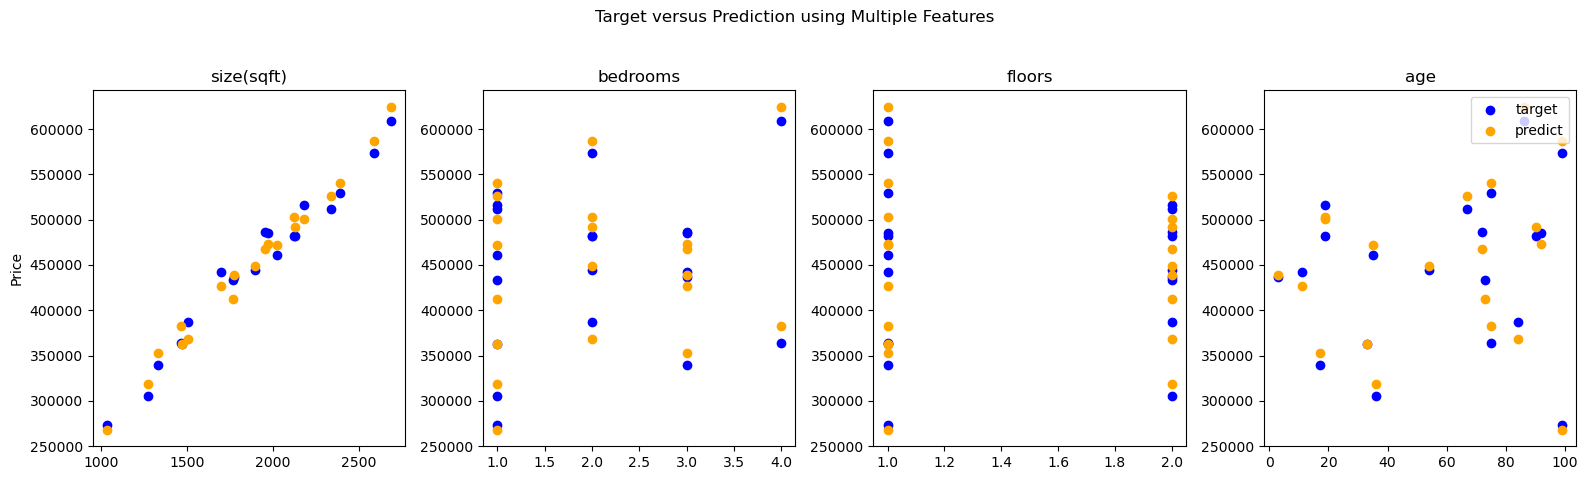

In [276]:
df = X_test.copy()
df['price'] = y_test
df['predicted_price'] = y_pred

fig, axes = plt.subplots(1, 4, figsize=(16, 5))

# Plot for 'size'
axes[0].scatter(df['size'], df['price'], color='blue', label='target')
axes[0].scatter(df['size'], df['predicted_price'], color='orange', label='predict')
axes[0].set_title('size(sqft)')
axes[0].set_ylabel('Price')

# Plot for 'bedrooms'
axes[1].scatter(df['bedrooms'], df['price'], color='blue', label='target')
axes[1].scatter(df['bedrooms'], df['predicted_price'], color='orange', label='predict')
axes[1].set_title('bedrooms')

# Plot for 'floors'
axes[2].scatter(df['floors'], df['price'], color='blue', label='target')
axes[2].scatter(df['floors'], df['predicted_price'], color='orange', label='predict')
axes[2].set_title('floors')

# Plot for 'age'
axes[3].scatter(df['age'], df['price'], color='blue', label='target')
axes[3].scatter(df['age'], df['predicted_price'], color='orange', label='predict')
axes[3].set_title('age')

plt.suptitle('Target versus Prediction using Multiple Features')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(loc='upper right')
plt.show()

### Step 5: Use model to make a prediction

The goal of this project was to be able to predict the house price of a house with a given sqft. <br>
The input features can be edited below to return the predicted house price. 

In [277]:
# Example input data: size=2500 sqft, age=20 years, bedrooms=3, floors=2
input_data = pd.DataFrame({
    'size': [2500],
    'bedrooms': [3],
    'floors': [2],
    'age': [20]
})

# Use the trained model to predict the price
predicted_price = model.predict(input_data)

print(f"Estimated Price for the house: £{predicted_price[0]:,.2f}")

Estimated Price for the house: £581,524.26


## Conclusion

Adding more data definitely helps with confidence in the algorithms as it is more likely to spot the overall trend and less likely to draw a incorrect correlation. 

Just using the sqft to predict a house price in part 1 and 2 of this project was a great first start and you can make predictions based solely on this but you would be missing the fact the multiple factors go in to how much a house costs. In part 3 of this project I introducted multiple input features/ variables which can improve the prediction model as it is based on some of the multiple features that make up house prices. 

I am happy with the progress I have made from part 1 of this project and just using two data points to part 3 of this project using multiple features and datasets to improve the reliablity of the model. The real world is still more complicated and I would need to use a lot more data and a lot more features to have any real sense of confidence in the model. 